In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
%pip install xgboost
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\lrodr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
# NOTA IMPORTANTE: AQUÍ SÓLO SE MUESTRA EL CÓDIGO NECESARIO PARA APLICAR RANDOM FOREST.

# RECUÉRDESE LA IMPORTANCIA DE LOS PASOS A SEGUIR PARA IMPLEMENTAR DE FORMA ADECUADA UN MODELO:
# (1) CARGAR BASE DE DATOS Y CONOCER FRECUENCIA DE CLASES O DISTRIBUCIÓN DE ACUERDO CON EL TIPO DE PROBLEMA.
# (2) DIVIR TRAIN, TEST Y COMPROBAR SI LA DISTRIBUCIÓN DE LA VARIABLE DEPENDIENTE ES SIMILAR EN AMBOS SETS.
# (3) AJUSTAR EL MODELO Y VALORAR LAS NECESIDADES DE INVESTIGACIÓN PARA DAR MÁS PESO A UNAS MEDIDAS DE BONDAD DE AJUSTE CON RESPECTO A OTRAS. 
# (3.1) APLICAR VALIDACIÓN CRUZADA Y, EN CASO DE NECESIDAD, UN GRIDSEARCH PARA CONOCER LAS BONDADES DE AJUSTE PARA DISTINTAS PARAMETRIZACIONES.
# (4) HACER PREDICCIONES SOBRE TRAIN Y TEST CON EL FIN DE OBSERVAR EL POSIBLE SOBREAJUSTE. VALORAR EN TEST LA CAPACIDAD PREDICTIVA DEL MODELO.
# (5) SELECCIONAR LAS ALTERNATIVAS QUE MÁS NOS INTERESEN POR SU BONDAD DE AJUSTE ESPECÍFICA.
# (6) MOSTRAR BOXPLOTS DE SU PERFORMANCE EN LAS DISTINTAS VALIDACIONES PARA VALORAR LA ROBUSTEZ Y TOMAR UNA DECISIÓN.
# (7) HACER UN INFORME DE LA PARAMETRIZACIÓN Y BONDAD DE AJUSTE DEL MODELO FINAL SELECCIONADO.

In [39]:
file_path = 'C:/Users/user/OneDrive - Universidad Complutense de Madrid (UCM)/Escritorio/A_Doctorado/23/00_DOCENCIA/Máster Tit_Propio/Árboles/arboles.csv'  # Reemplaza con la ruta correcta de tu archivo
file_path_2 = 'E:/OneDrive - Universidad Complutense de Madrid (UCM)/Escritorio/A_Doctorado/23/00_DOCENCIA/Máster Tit_Propio/Árboles/arboles.csv'
file_path_3 = 'C:/Users/lrodr/OneDrive/Documentos/master_ucm/trabajos/11/arboles.csv'
df = pd.read_csv(file_path_3)
print(df.head())
print(f'\nLa frecuencia de cada clase es: \n{df.chd.value_counts(normalize=True)}')

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1

La frecuencia de cada clase es: 
chd
0    0.65368
1    0.34632
Name: proportion, dtype: float64


In [40]:
# Categorizar la variable de respuesta
#df['chd'] = df['chd'].apply(lambda x: 'Yes' if x == 1 else 'No')
print(df.head())

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1


In [41]:
#es importante tratar de forma adecuada las variables categóricas. Se convierten en numéricas con la regla: one hot encoding.
df[['famhist']] = pd.get_dummies(df[['famhist']],drop_first=True)
# Separar las variables predictoras y la variable de respuesta.
X = df.drop('chd', axis=1)
y = df['chd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [42]:
# ES IMPORTANTE QUE LA DISTRIBUCIÓN DE LAS CLASES SEA 'SIMILAR' EN TRAIN Y TEST.
print(f'La frecuencia de cada clase en train es: \n{y_train.value_counts(normalize=True)}')
print(f'\nLa frecuencia de cada clase en test es: \n{y_test.value_counts(normalize=True)}')

La frecuencia de cada clase en train es: 
chd
0    0.655827
1    0.344173
Name: proportion, dtype: float64

La frecuencia de cada clase en test es: 
chd
0    0.645161
1    0.354839
Name: proportion, dtype: float64


In [43]:
print(df.head())

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11     True     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61    False     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28     True     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03     True     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78     True     60    25.99    57.34   49    1


In [44]:
xgb_classifier = XGBClassifier(booster = 'gbtree', n_estimators = 200, 
                               eta = 0.1, gamma = 1, random_state=123, max_depth = 15, tree_method = 'hist')
xgb_classifier.fit(X_train, y_train)
y_pred_base = xgb_classifier.predict(X_test)
# Evaluar el rendimiento del modelo
accuracy_a = accuracy_score(y_test, y_pred_base)
print(f'Precisión de gradient boosting: {accuracy_a}')

Precisión de gradient boosting: 0.7204301075268817


In [45]:
# se procede a observar el posible sobreajuste comparando predicciones en train y test.
# predicciones significativamente mayores en train que en test puede indicar sobreajuste.
# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred)}')
print('Nótese la diferencia en accuracy para ambos conjuntos de datos y el posible sobreajuste.')

Se tiene un accuracy para train de: 0.983739837398374
Se tiene un accuracy para test de: 0.7204301075268817
Nótese la diferencia en accuracy para ambos conjuntos de datos y el posible sobreajuste.


In [46]:
params = {
    'n_estimators': [50, 100, 200, 250],
    'eta' : [0.1, 0.5, 0.7, 1],
    'gamma' : [0.1, 0.5, 1, 2],
    'max_depth': [3, 5, 7], 
    'tree_method': ['auto', 'exact', 'aprox', 'hist'],
    'multi_strategy': ['one_output_per_tree', 'multi_output_tree'],
    'subsample': [0.5, 0.75, 1]
}

scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
#recordar que arbol2 es el árbol cuyas VI son todas las variables.
# cv = crossvalidation
grid_search_XGB = GridSearchCV(estimator=xgb_classifier, 
                           param_grid=params, 
                           cv=4, scoring = scoring_metrics, refit='accuracy')
grid_search_XGB.fit(X_train, y_train)

C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2916 fits failed out of a total of 7776.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1944 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.1,
                                     eval_metric=None, feature_types=None,
                                     gamma=1, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_r...
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'eta': [0.05, 0.1, 0.2], 'gamma': [0.5, 1, 2],
                         'max_depth': [5, 7, 9],
                         'multi_strategy': ['one_output_per_tree',
                                            'multi_output_tree'],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.75, 1],
                         'tree_method': ['auto', 'exact', 'aprox', 'hist']},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [47]:
# observar los parámetros y determinar si merece la pena modificar el grill de parametrización:

grid_search_XGB.best_estimator_.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy='one_output_per_tree',
              n_estimators=50, n_jobs=None, num_parallel_tree=None, ...)>

In [48]:
# Obtener resultados del grid search
results = pd.DataFrame(grid_search_XGB.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta,param_gamma,param_max_depth,param_multi_strategy,param_n_estimators,param_subsample,...,mean_test_recall_macro,std_test_recall_macro,rank_test_recall_macro,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,0.029378,0.004349,0.009879,0.001139,0.05,0.5,5,one_output_per_tree,50,0.50,...,0.600987,0.061858,1139,0.511846,0.557074,0.682277,0.649894,0.600273,0.068688,1156
1,0.021502,0.000499,0.010127,0.000741,0.05,0.5,5,one_output_per_tree,50,0.50,...,0.614915,0.025870,862,0.582492,0.642230,0.596674,0.647510,0.617226,0.028156,861
2,0.004751,0.000433,0.000000,0.000000,0.05,0.5,5,one_output_per_tree,50,0.50,...,NaN,NaN,1216,NaN,NaN,NaN,NaN,NaN,NaN,1216
3,0.026255,0.001954,0.009001,0.001581,0.05,0.5,5,one_output_per_tree,50,0.50,...,0.600987,0.061858,1139,0.511846,0.557074,0.682277,0.649894,0.600273,0.068688,1156
4,0.022751,0.001089,0.010128,0.000542,0.05,0.5,5,one_output_per_tree,50,0.75,...,0.611959,0.025572,938,0.574084,0.623961,0.614955,0.649894,0.615724,0.027249,908


In [49]:
# Ordenar el DataFrame por la métrica de interés (por ejemplo, accuracy)
sorted_results = results.sort_values(by='mean_test_accuracy', ascending=True).head(5)
# se selecciona el modelo candidato, y se procede a analizar su robustez a lo largo de cross validation.
res_1 = sorted_results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[0]
res_2 = sorted_results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[1]
res_3 = sorted_results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[2]
res_4 = sorted_results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[3]
res_5 = sorted_results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[4]

C:\Users\lrodr\AppData\Local\Temp\ipykernel_3568\913223930.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([res_1.values,res_2.values,res_3.values,res_4.values,res_5.values], labels = ['res_1','res_2','res_3','res_4','res_5'])


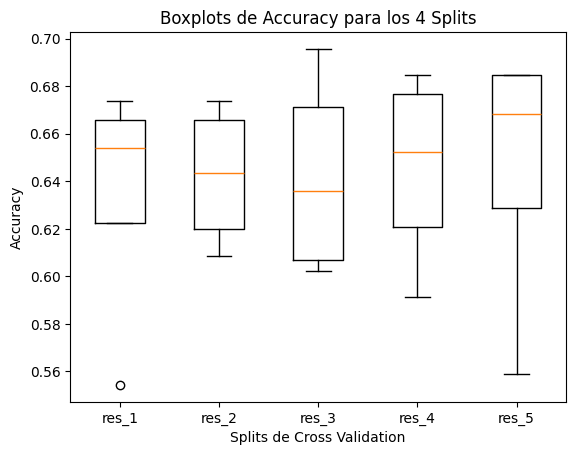

In [50]:
# Crear un boxplot para los cuatro valores de accuracy
plt.boxplot([res_1.values,res_2.values,res_3.values,res_4.values,res_5.values], labels = ['res_1','res_2','res_3','res_4','res_5'])
plt.title('Boxplots de Accuracy para los 4 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()

In [51]:
sorted_results['params'].iloc[3]

{'eta': 0.2,
 'gamma': 0.5,
 'max_depth': 5,
 'multi_strategy': 'one_output_per_tree',
 'n_estimators': 200,
 'subsample': 0.5,
 'tree_method': 'exact'}

In [52]:
modelo_XGB = grid_search_XGB.best_estimator_

y_train_pred_xgb = modelo_XGB.predict(X_train)
y_test_pred_xgb = modelo_XGB.predict(X_test)
print(f'Se tiene un accuracy para train de: {accuracy_score(y_train,y_train_pred_xgb)}')
print(f'Se tiene un accuracy para test de: {accuracy_score(y_test,y_test_pred_xgb)}')
print('Nótese la diferencia en accuracy para ambos conjuntos de datos sigue alta con estos parámetros.')

Se tiene un accuracy para train de: 0.948509485094851
Se tiene un accuracy para test de: 0.7311827956989247
Nótese la diferencia en accuracy para ambos conjuntos de datos sigue alta con estos parámetros.


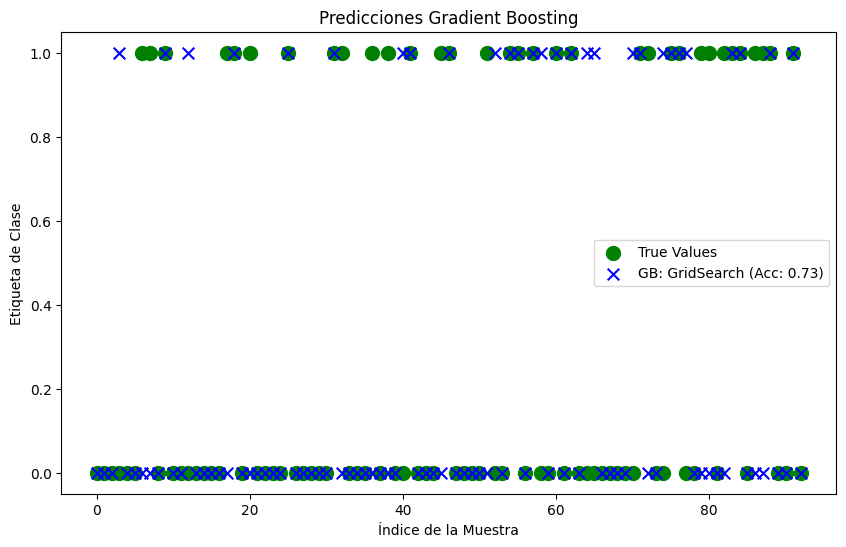

In [53]:
# Crear un gráfico de dispersión para comparar las predicciones
plt.figure(figsize=(10, 6))

plt.scatter(np.arange(len(y_test)), y_test, color='green', label='True Values', marker='o', s=100)
plt.scatter(np.arange(len(y_test)), y_test_pred_xgb, color='blue', label=f'GB: GridSearch (Acc: {accuracy_score(y_test,y_test_pred_xgb):.2f})', marker='x', s=70)

plt.title('Predicciones Gradient Boosting')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Etiqueta de Clase')
plt.legend()
plt.show()

In [54]:
print('Resultados para Modelo')
print(classification_report(y_test, y_test_pred_xgb))

Resultados para Modelo
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        60
           1       0.64      0.55      0.59        33

    accuracy                           0.73        93
   macro avg       0.71      0.69      0.70        93
weighted avg       0.72      0.73      0.73        93



A CONTINUACIÓN, SE REALIZARÁ EL EJEMPLO PARA EL CASO DE PROBLEMAS DE REGRESIÓN.

In [55]:
file_path = 'C:/Users/user/OneDrive - Universidad Complutense de Madrid (UCM)/Escritorio/A_Doctorado/23/00_DOCENCIA/Máster Tit_Propio/Árboles/compress.csv'  # Reemplaza con la ruta correcta de tu archivo
file_path_3 = 'E:/OneDrive - Universidad Complutense de Madrid (UCM)/Escritorio/A_Doctorado/23/00_DOCENCIA/Máster Tit_Propio/Árboles/compress.csv'  # Reemplaza con la ruta correcta de tu archivo
file_path_4 = 'C:/Users/lrodr/OneDrive/Documentos/master_ucm/trabajos/11/compress.csv'

compress = pd.read_csv(file_path_4)
compress.head()

,cstrength,cement,blast,ash,water,plasti,aggreg,fineagg,age
0,79.99,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,61.89,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,40.27,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,41.05,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,44.30,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [56]:
# Separar las variables predictoras y la variable de respuesta.
X_c = compress.drop('cstrength', axis=1)
y_c = compress['cstrength']
xgb_regressor = XGBRegressor(booster = 'gbtree', n_estimators = 200, 
                               eta = 0.1, gamma = 1, random_state=123, max_depth = 15, tree_method = 'hist')
# Crear un conjunto de entrenamiento y uno de prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=123)
# Construir el modelo de árbol de decisiones
xgb_regressor.fit(X_train_c, y_train_c)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [57]:
#se valora el posible sobreajuste
pred_xgb_c_train = xgb_regressor.predict(X_train_c)
pred_xgb_c_test = xgb_regressor.predict(X_test_c)
print(f'MAE del modelo en train:{mean_absolute_error(y_train_c,pred_xgb_c_train)}')
print(f'MAE del modelo en test:{mean_absolute_error(y_test_c,pred_xgb_c_test)}')

MAE del modelo en train:0.43779781919081223
MAE del modelo en test:3.2480094543012608


In [58]:
# En caso de necesitar probar diferentes parametrizaciones. En este caso, iremos directamente a la validación cruzada.
params = {
    'n_estimators': [100,200,300],
    'eta' : [0.1,0.4,0.7],
    'gamma' : [0.1,0.5,1],
    'max_depth': [5, 10]
}
# Definir las métricas de evaluación que deseas utilizar



In [59]:
scoring_metrics_c = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error)
}
# los parámetros necesitan presentar formato lista.
params = {
    'n_estimators': [100,200,300],
    'eta' : [0.1,0.4,0.7],
    'gamma' : [0.1,0.5,1],
    'max_depth': [5, 10]
}
grid_search_xgb_c = GridSearchCV(estimator=xgb_regressor, 
                           param_grid=params, 
                           cv=4, scoring = scoring_metrics_c, refit='MAE')
grid_search_xgb_c.fit(X_train_c, y_train_c)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eta=0.1,
                                    eval_metric=None, feature_types=None,
                                    gamma=1, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_ra...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=200,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'eta': [0.1, 0.4, 0.7], 'gamma': [0.1, 0.5, 1],
                         'max_depth': [5, 10],
                         'n_estimators': [100, 200, 300]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict')})

In [60]:
pd.DataFrame(grid_search_xgb_c.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_eta', 'param_gamma', 'param_max_depth', 'param_n_estimators',
       'params', 'split0_test_MAE', 'split1_test_MAE', 'split2_test_MAE',
       'split3_test_MAE', 'mean_test_MAE', 'std_test_MAE', 'rank_test_MAE',
       'split0_test_MSE', 'split1_test_MSE', 'split2_test_MSE',
       'split3_test_MSE', 'mean_test_MSE', 'std_test_MSE', 'rank_test_MSE'],
      dtype='object')

In [61]:
# Ordenar el DataFrame por la métrica de interés (por ejemplo, accuracy)
sorted_results_c = pd.DataFrame(grid_search_xgb_c.cv_results_).sort_values(by='mean_test_MAE', ascending=True).head(5)

In [62]:

res_1_c = sorted_results_c[['split0_test_MAE', 'split1_test_MAE','split2_test_MAE','split3_test_MAE']].iloc[0]
res_2_c = sorted_results_c[['split0_test_MAE', 'split1_test_MAE','split2_test_MAE','split3_test_MAE']].iloc[1]
res_3_c = sorted_results_c[['split0_test_MAE', 'split1_test_MAE','split2_test_MAE','split3_test_MAE']].iloc[2]

C:\Users\lrodr\AppData\Local\Temp\ipykernel_3568\3614177161.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([res_1_c.values,res_2_c.values,res_3_c.values], labels = ['res_1','res_2','res_3'])


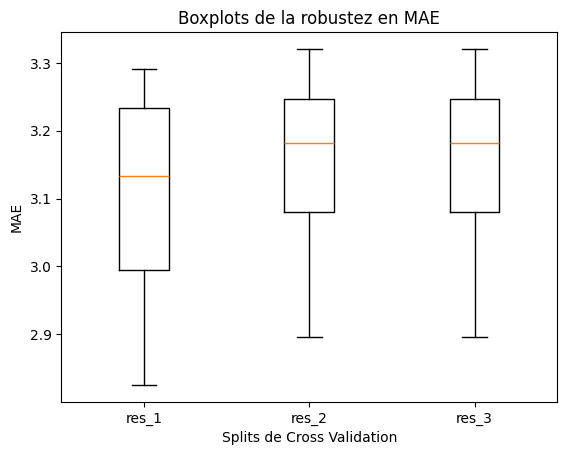

In [63]:
# Crear un boxplot para los cuatro valores de accuracy
plt.boxplot([res_1_c.values,res_2_c.values,res_3_c.values], labels = ['res_1','res_2','res_3'])
plt.title('Boxplots de la robustez en MAE')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('MAE')
plt.show()

In [64]:
# seleccionemos el mejor modelo propuesto por GridSearch
# nótese que "**" es para desempaquetar una lista de valores.
grid_search_xgb_c_fin = XGBRegressor(**sorted_results_c['params'].iloc[0])
grid_search_xgb_c_fin.fit(X_train_c, y_train_c)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [65]:
#se valora el posible sobreajuste
pred_xgb_c_train_fin = grid_search_xgb_c_fin.predict(X_train_c)
pred_xgb_c_test_fin = grid_search_xgb_c_fin.predict(X_test_c)
print(f'MAE del modelo en train:{mean_absolute_error(y_train_c,pred_xgb_c_train_fin)}')
print(f'MAE del modelo en test:{mean_absolute_error(y_test_c,pred_xgb_c_test_fin)}')

MAE del modelo en train:0.7014421172859598
MAE del modelo en test:2.778095599794851


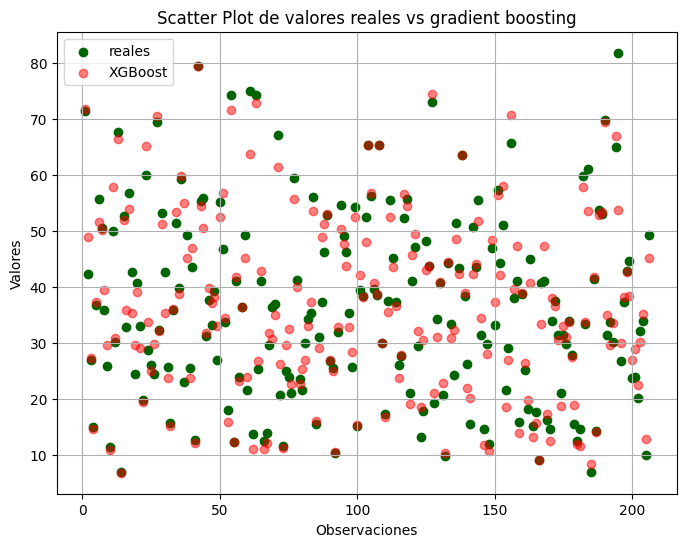

In [66]:
indices = np.arange(1, len(y_test_c) + 1)

plt.figure(figsize=(8, 6))
plt.scatter(indices, y_test_c, color='darkgreen', label='reales')  # Puedes ajustar el color según tus preferencias

plt.scatter(indices, pred_xgb_c_test_fin, color='red', alpha=0.5, label='XGBoost')  # Puedes ajustar el color y la transparencia según tus preferencias

plt.title('Scatter Plot de valores reales vs gradient boosting')
plt.xlabel('Observaciones')
plt.ylabel('Valores')
plt.legend()  # Agregar leyenda
plt.grid(True)
plt.show()

In [67]:
# Calcular diferentes medidas de bondad de ajuste
mae = mean_absolute_error(y_test_c, pred_xgb_c_test_fin)
mse = mean_squared_error(y_test_c, pred_xgb_c_test_fin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_c, pred_xgb_c_test_fin)

# Imprimir las métricas
print(f'MAE (Error Absoluto Medio): {mae:.2f}')
print(f'MSE (Error Cuadrático Medio): {mse:.2f}')
print(f'RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}')
print(f'R2: {r2}')
print('\nTéngase en cuenta que, dado el ejemplo propuesto, el sobreajuste es muy alto como para determinar que el \najuste del modelo es óptimo')

MAE (Error Absoluto Medio): 2.78
MSE (Error Cuadrático Medio): 20.58
RMSE (Raíz del Error Cuadrático Medio): 4.54
R2: 0.9249970628297842

Téngase en cuenta que, dado el ejemplo propuesto, el sobreajuste es muy alto como para determinar que el 
ajuste del modelo es óptimo


In [68]:
results = pd.DataFrame(grid_search_xgb_c.cv_results_)

In [69]:
pd.DataFrame(grid_search_xgb_c.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_eta', 'param_gamma', 'param_max_depth', 'param_n_estimators',
       'params', 'split0_test_MAE', 'split1_test_MAE', 'split2_test_MAE',
       'split3_test_MAE', 'mean_test_MAE', 'std_test_MAE', 'rank_test_MAE',
       'split0_test_MSE', 'split1_test_MSE', 'split2_test_MSE',
       'split3_test_MSE', 'mean_test_MSE', 'std_test_MSE', 'rank_test_MSE'],
      dtype='object')

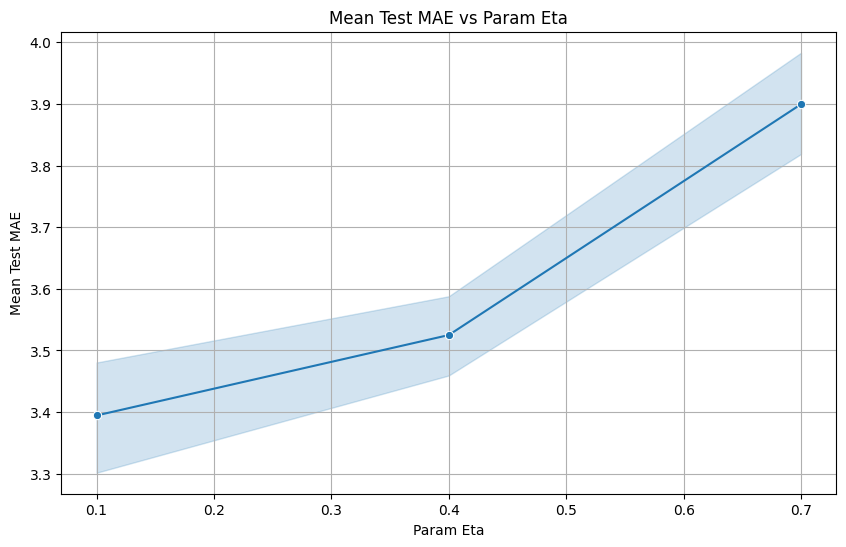

In [70]:
results['param_eta'] = results['param_eta'].astype(float)
results['mean_test_MAE'] = results['mean_test_MAE'].astype(float)

# Crear el lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_eta', y='mean_test_MAE', data=results, marker='o')
# Personalizar el gráfico
plt.title('Mean Test MAE vs Param Eta')
plt.xlabel('Param Eta')
plt.ylabel('Mean Test MAE')
plt.grid(True)
plt.show()

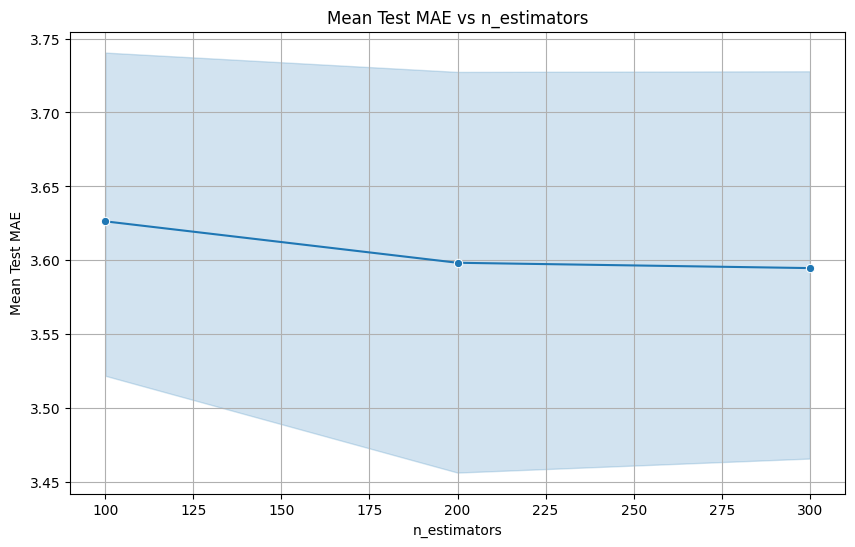

In [71]:
results['param_n_estimators'] = results['param_n_estimators'].astype(float)
# Crear el lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_estimators', y='mean_test_MAE', data=results, marker='o')
# Personalizar el gráfico
plt.title('Mean Test MAE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test MAE')
plt.grid(True)
plt.show()

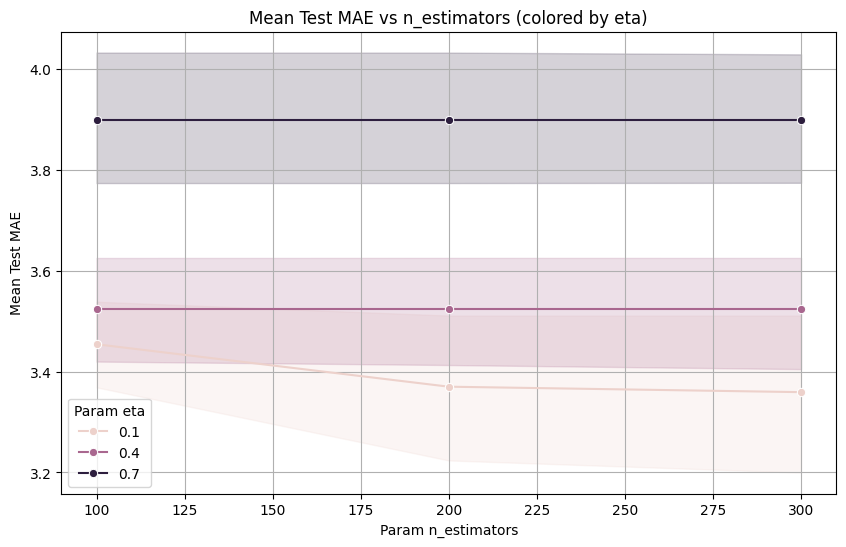

In [72]:
results['param_eta'] = results['param_eta'].astype(float)
results['param_n_estimators'] = results['param_n_estimators'].astype(float)
results['mean_test_MAE'] = results['mean_test_MAE'].astype(float)

# Crear el lineplot con diferentes líneas para cada valor de 'param_n_estimators'
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_estimators', y='mean_test_MAE', hue='param_eta', data=results, marker='o')

# Personalizar el gráfico
plt.title('Mean Test MAE vs n_estimators (colored by eta)')
plt.xlabel('Param n_estimators')
plt.ylabel('Mean Test MAE')
plt.legend(title='Param eta')
plt.grid(True)
plt.show()